<a href="https://colab.research.google.com/github/MekhzZ/LearningPath/blob/main/DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Mining**

# **Finding the optimal number of clusters in K means clustering**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('/content/best_sellers.csv')

In [5]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
x = df.iloc[:, [2,4]].values

In [7]:
x

array([[ 4.7,  8. ],
       [ 4.6, 22. ],
       [ 4.7, 15. ],
       ...,
       [ 4.7,  8. ],
       [ 4.7,  8. ],
       [ 4.7,  8. ]])

In [8]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [9]:
df[['User Rating', 'Price']].values

array([[ 4.7,  8. ],
       [ 4.6, 22. ],
       [ 4.7, 15. ],
       ...,
       [ 4.7,  8. ],
       [ 4.7,  8. ],
       [ 4.7,  8. ]])

# **Using Elbow Method to find optimal clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<function matplotlib.pyplot.show(close=None, block=None)>

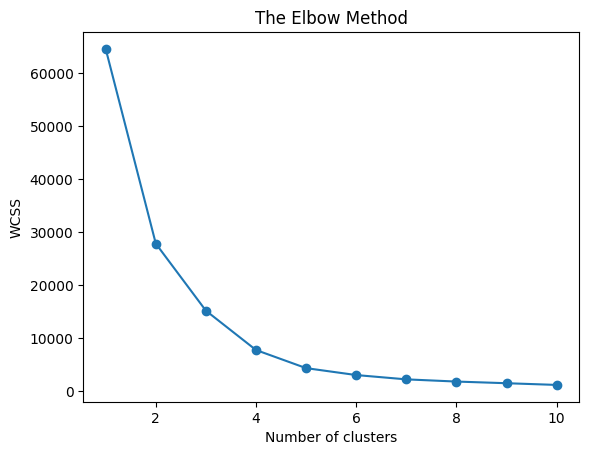

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

from above diagram we can see that from 5, the garph is bending slightly , so we can conclude that the optimal number of clusters is 5

# **Training Kmeans Model**

In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
y_kmeans

array([3, 4, 0, 3, 0, 0, 4, 0, 3, 3, 3, 3, 4, 3, 0, 3, 3, 3, 3, 0, 0, 0,
       0, 3, 0, 3, 3, 0, 3, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 1, 1, 3, 0, 4, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       4, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       4, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3, 2, 0, 4,
       0, 0, 4, 4, 3, 2, 3, 3, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 4, 0, 4, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 4, 3, 0, 0, 3, 3,
       0, 3, 0, 3, 3, 0, 4, 0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3,
       3, 0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 4, 4, 3, 3,
       3, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 3, 3, 3,
       0, 0, 0, 0, 4, 4, 3, 3, 3, 3, 0, 0, 3, 4, 0,

Cluster centers with x and y coordinates

In [13]:
kmeans.cluster_centers_

array([[ 4.56      , 13.92820513],
       [ 4.56666667, 97.33333333],
       [ 4.53333333, 44.57142857],
       [ 4.67180451,  6.57518797],
       [ 4.60461538, 23.26153846]])

Visualizing Clusters

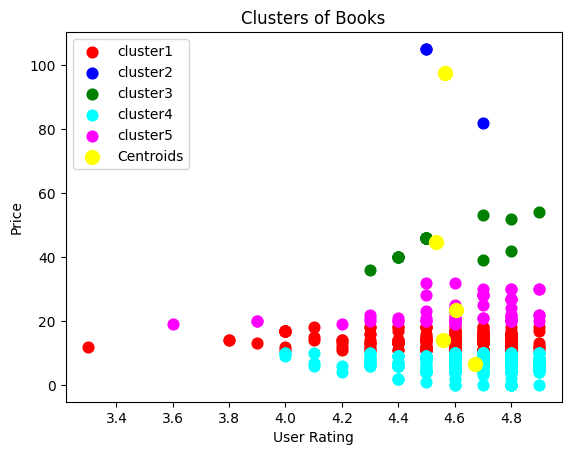

In [14]:
color_list = ['red', 'blue', 'green', 'cyan', 'magenta']
cluster_label = ['cluster1','cluster2','cluster3','cluster4','cluster5']
for i in range(5):
  plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1], s = 60, c = color_list[i], label = cluster_label[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Books')
plt.xlabel('User Rating')
plt.ylabel('Price')
plt.legend()
plt.show()

Hierarchical Clustering in notes


# **DBSCAN (Density Based Spatial Clustering of Applications using Noise)**

DBSCAN is able to find the clusters with noise which helps us to find the right pattern

**Two key parameters**


1.   eps , distance between neighbours
2.   minPts , Minimum number of datapoints to define cluster


**Based on above parameters, points are classified into**



1.   Core - center of the cluster
2.   Border - atleast one core at the center
3. Noise - outlier





**Let's Implement it**

In [17]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [18]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [20]:
x = df.iloc[:, [3,4]].values

In [21]:
x

array([[17350,     8],
       [ 2052,    22],
       [18979,    15],
       ...,
       [14331,     8],
       [14331,     8],
       [14331,     8]])

Implementing DBSCAN using sklearn with distance metric euclidean of 3 and min sample is 4. It's all hit and try method

In [22]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=4, metric = 'euclidean')
y_dbscan = dbscan.fit_predict(x)
y_dbscan

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1,  2,  2,  2,  2,  2, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  3,  3,  3,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4,  4,  4,  4,
        4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        5,  5,  5,  5,  5,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  6,  6,  6,  6,  6, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

The 0 value represents there is a outlier

In [25]:
df['Cluster'] = y_dbscan

In [27]:
df['Cluster'].unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24])

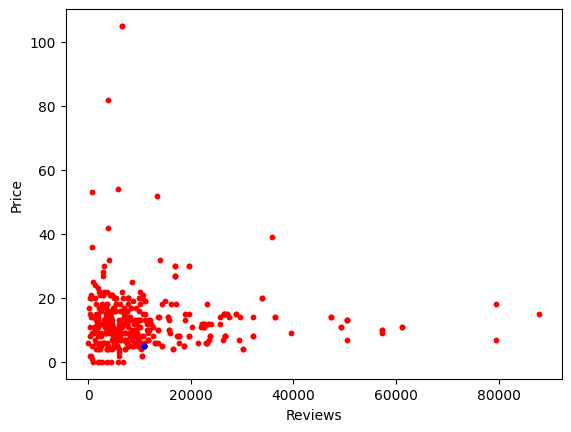

In [41]:
plt.scatter(x[y_dbscan == -1,0], x[y_dbscan == -1,1],s = 10, c = 'red')
plt.scatter(x[y_dbscan == 0,0], x[y_dbscan == 0,1],s = 10, c = 'blue')

plt.xlabel('Reviews')
plt.ylabel('Price')
plt.show()

